<a href="https://colab.research.google.com/github/anshultaneja/-Deep-Learning-model-with-Animal-data-Digital-Image-Processing-/blob/main/Recognize_an_Animal_in_an_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Github Repository


In [ ]:
!git clone 'https://github.com/dphi-official/Datasets/'

Cloning into 'Datasets'...
remote: Enumerating objects: 9874, done.
remote: Total 9874 (delta 0), reused 0 (delta 0), pack-reused 9874
Receiving objects: 100% (9874/9874), 427.70 MiB | 36.99 MiB/s, done.
Resolving deltas: 100% (102/102), done.
Checking out files: 100% (9345/9345), done.


In [ ]:
# To unzip train_beg.zip
!unzip /content/Datasets/animal_data/train_beg.zip 

# To unzip test_beg.zip
!unzip /content/Datasets/animal_data/test_beg.zip

## Loading Libraries

In [ ]:
import pandas as pd
import numpy as np

## Loading the Data

In [ ]:
# Loading training csv file
train_labels = pd.read_csv("/content/Datasets/animal_data/Training_set_animals.csv")
train_labels.head()    # display first five rows from train_labels dataframe

,filename,animal_type
0,Image_1.jpg,mucca
1,Image_2.jpg,mucca
2,Image_3.jpg,mucca
3,Image_4.jpg,mucca
4,Image_5.jpg,mucca


In [ ]:
image_paths = ['/content/train_beg/' + fname for fname in train_labels['filename']]
image_paths 

In [ ]:
# Confirm if number of filepaths (i.e. images) is same as number of labels given
if len(train_labels) == len(image_paths):
    print('Number of labels i.e. ', len(train_labels), 'matches the number of filepaths i.e. ', len(image_paths))
else:
    print('Number of labels does not match the number of filepaths')

Number of labels i.e.  1200 matches the number of filepaths i.e.  1200


In [ ]:
train_data = pd.DataFrame({'filename': train_labels['filename'], 'filepath': image_paths, 'animal_type': train_labels['animal_type']})
#train_data= train_data.sample(frac = 1)
train_data.head()

,filename,filepath,animal_type
0,Image_1.jpg,/content/train_beg/Image_1.jpg,mucca
1,Image_2.jpg,/content/train_beg/Image_2.jpg,mucca
2,Image_3.jpg,/content/train_beg/Image_3.jpg,mucca
3,Image_4.jpg,/content/train_beg/Image_4.jpg,mucca
4,Image_5.jpg,/content/train_beg/Image_5.jpg,mucca


In [ ]:
print(train_data.iloc[698])

filename                          Image_699.jpg
filepath       /content/train_beg/Image_699.jpg
animal_type                              pecora
Name: 698, dtype: object


### Display an Image

In [ ]:
file_path = train_data['filepath']
file_path

0          /content/train_beg/Image_1.jpg
1          /content/train_beg/Image_2.jpg
2          /content/train_beg/Image_3.jpg
3          /content/train_beg/Image_4.jpg
4          /content/train_beg/Image_5.jpg
                      ...                
1195    /content/train_beg/Image_1196.jpg
1196    /content/train_beg/Image_1197.jpg
1197    /content/train_beg/Image_1198.jpg
1198    /content/train_beg/Image_1199.jpg
1199    /content/train_beg/Image_1200.jpg
Name: filepath, Length: 1200, dtype: object

In [ ]:
import cv2
import random

In [ ]:
rand_no = random.randint(0,len(file_path))
path = file_path[rand_no]
img = cv2.imread(path,1)

In [ ]:
img.shape

(200, 300, 3)

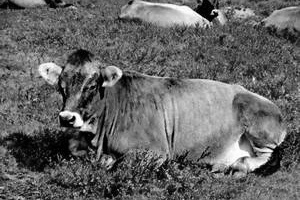

In [ ]:
from google.colab.patches import cv2_imshow
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)
 
# waiting for key event
cv2.waitKey(0)

# destroying all windows
cv2.destroyAllWindows()

In [ ]:
animal_type = train_data['animal_type']
animal = animal_type[rand_no]
animal

'pecora'

## Loading Image's Pixel Values

In [ ]:
data = []    # initialize a list to store, each image's pixel values 
labels = []   # initialize a list to store each image's labels i.e. animal type
for i in range(len(train_data)):
  image_arr = cv2.imread(train_data['filepath'][i])     # for each i starting from 0, convert the ith image to array of pixels
  data.append(image_arr)
  # We also need to convert the categorical values i.e. 'mucca' and 'pecora' to numerical
  # Using conditional statement, we can do it here only. if mucca then 0, if pecora then 1
  if train_data['animal_type'][i] == 'mucca':           # if respective image's label is mucca
    labels.append(0)
  else:               # since there are only two type of animals, if the animal is not mucca, it will be pecora
    labels.append(1)      # This indexing needs to be remembered 'mucca' = 0 and 'pecora' = 1, this will be required when you convert your predictions on test data to categorical value again


In [ ]:
labels

### Display image using pixel values

In [ ]:
import matplotlib.pyplot as plt

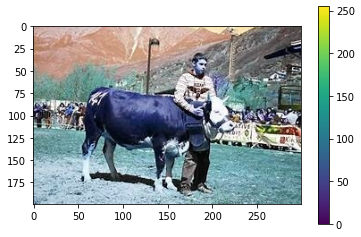

In [ ]:
plt.figure()
plt.imshow(data[536])
plt.colorbar()
plt.grid(False)
plt.show()

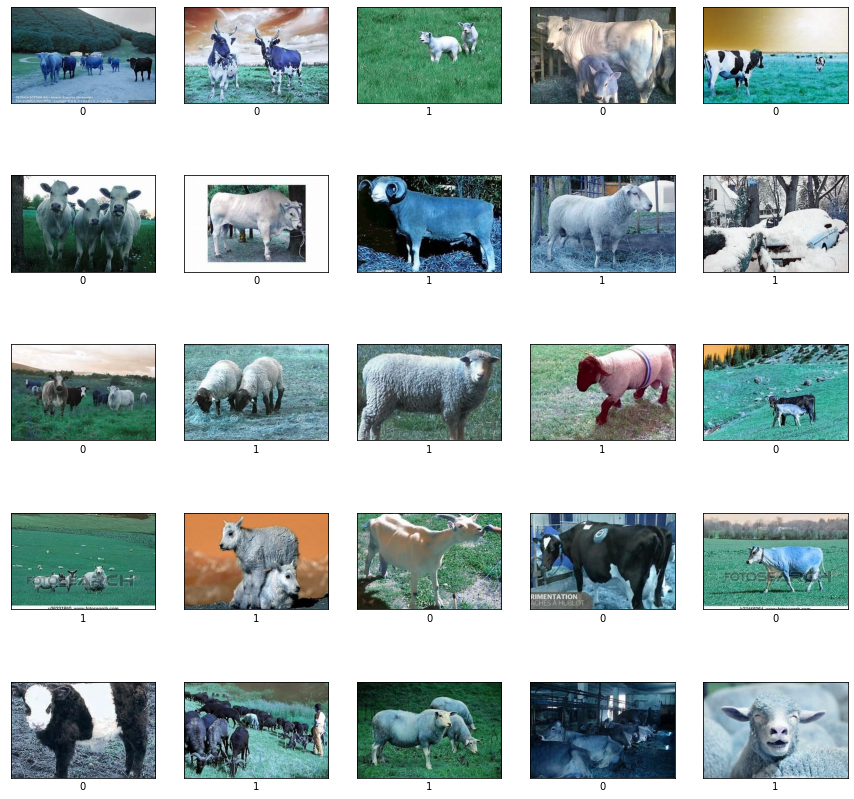

In [ ]:
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  rand_no1 = random.randint(0,len(data))     
  plt.imshow(data[rand_no1], cmap='gray')
  plt.xlabel(labels[rand_no1])

## Separating Input Features and Output Features

In [ ]:
x1 = np.asarray(data)
y1 = np.asarray(labels)

In [ ]:
X = x1
y = y1

## Split the Data

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Normalizing the pixel values
X_train = X_train / 255.0
y_train = y_train / 255.0

## Building Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential    # import Sequential from tensorflow.keras
from tensorflow.keras.layers import Dense  # import Dense from tensorflow.keras.layers
from numpy.random import seed     # seed helps you to fix the randomness in the neural network.  

from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
%load_ext tensorboard

import datetime

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
# define input shape
INPUT_SHAPE = (200, 300, 3)

# define sequential model
model = tf.keras.models.Sequential()
# define conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), 
                                activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), 
                                activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 298, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 149, 16)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 97, 147, 32)       4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 73, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 112128)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               28705024  
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)              

In [ ]:

EPOCHS = 15
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, 
                                               restore_best_weights=True,
                                               verbose=1)

history = model.fit(X_train, y_train,
                    batch_size=32,
                    callbacks=[es_callback], 
                    validation_split=0.1, epochs=EPOCHS,
                    verbose=1)

Epoch 1/15
27/27 [==============================] - 1s 45ms/step - loss: 0.0634 - accuracy: 0.4815 - val_loss: 0.0180 - val_accuracy: 0.5208
Epoch 2/15
27/27 [==============================] - 1s 38ms/step - loss: 0.0172 - accuracy: 0.4954 - val_loss: 0.0152 - val_accuracy: 0.5208
Epoch 3/15
27/27 [==============================] - 1s 38ms/step - loss: 0.0165 - accuracy: 0.4954 - val_loss: 0.0141 - val_accuracy: 0.5208
Epoch 4/15
27/27 [==============================] - 1s 38ms/step - loss: 0.0159 - accuracy: 0.4954 - val_loss: 0.0138 - val_accuracy: 0.5208
Epoch 5/15
27/27 [==============================] - 1s 37ms/step - loss: 0.0153 - accuracy: 0.4954 - val_loss: 0.0136 - val_accuracy: 0.5208
Epoch 6/15
27/27 [==============================] - 1s 35ms/step - loss: 0.0150 - accuracy: 0.4954 - val_loss: 0.0139 - val_accuracy: 0.5208
Epoch 7/15
27/27 [==============================] - 1s 37ms/step - loss: 0.0149 - accuracy: 0.4954 - val_loss: 0.0135 - val_accuracy: 0.5208
Epoch 8/15
27

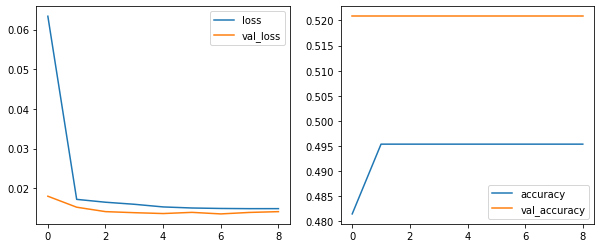

In [ ]:
import pandas as pd

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

In [ ]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 9ms/step - loss: 421.8262 - accuracy: 0.5083


[421.8262023925781, 0.5083333253860474]

## Predictions

In [ ]:
# Get the csv file given 'Testing_set_animals.csv'
test_image_ids = pd.read_csv("/content/Datasets/animal_data/Testing_set_animals.csv", names = ['filename'])  # there is no header in the csv file so we need to provide it. You can also do header = None
test_image_ids.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [ ]:
# Get image paths
image_paths = ['/content/test_beg/' + fname for fname in test_image_ids['filename']]
image_paths

In [ ]:
# Confirm if number of filepaths (i.e. images) is same as number of labels given
if len(test_image_ids) == len(image_paths):
    print('Number of labels i.e. ', len(test_image_ids), 'matches the number of filepaths i.e. ', len(image_paths))
else:
    print('Number of labels does not match the number of filepaths')

Number of labels i.e.  400 matches the number of filepaths i.e.  400


In [ ]:
test_data = pd.DataFrame({'filename': test_image_ids['filename'], 'filepath': image_paths})
test_data.head()

,filename,filepath
0,Image_1.jpg,/content/test_beg/Image_1.jpg
1,Image_2.jpg,/content/test_beg/Image_2.jpg
2,Image_3.jpg,/content/test_beg/Image_3.jpg
3,Image_4.jpg,/content/test_beg/Image_4.jpg
4,Image_5.jpg,/content/test_beg/Image_5.jpg


In [ ]:
data1= []    # initialize a list to store, each image's pixel values 
#labels = []   # initialize a list to store each image's labels i.e. animal type
for i in range(len(test_data)):
  image_arr = cv2.imread(test_data['filepath'][i])     # for each i starting from 0, convert the ith image to array of pixels
  data1.append(image_arr)

In [ ]:
x2 = np.asarray(data1)

In [ ]:
predictions = model.predict(x2)

In [ ]:
prediction = []
for value in predictions:
  if value <= 0.5:
    prediction.append('mucca')      # it can be 0 or your respective class 'mucca'
  else:
    prediction.append('pecora')      # it can be 1 or your respective class 'pecora'

In [ ]:
res = pd.DataFrame(prediction)
res.index = test_data.index
res.columns = ['pred']

from google.colab import files
res.to_csv('Prediction_animal_results.csv')
files.download('Prediction_animal_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>